In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

In [2]:
model = YOLO('yolov8x.pt')

In [3]:
classes = [2, 3, 7]

(595, 2204)


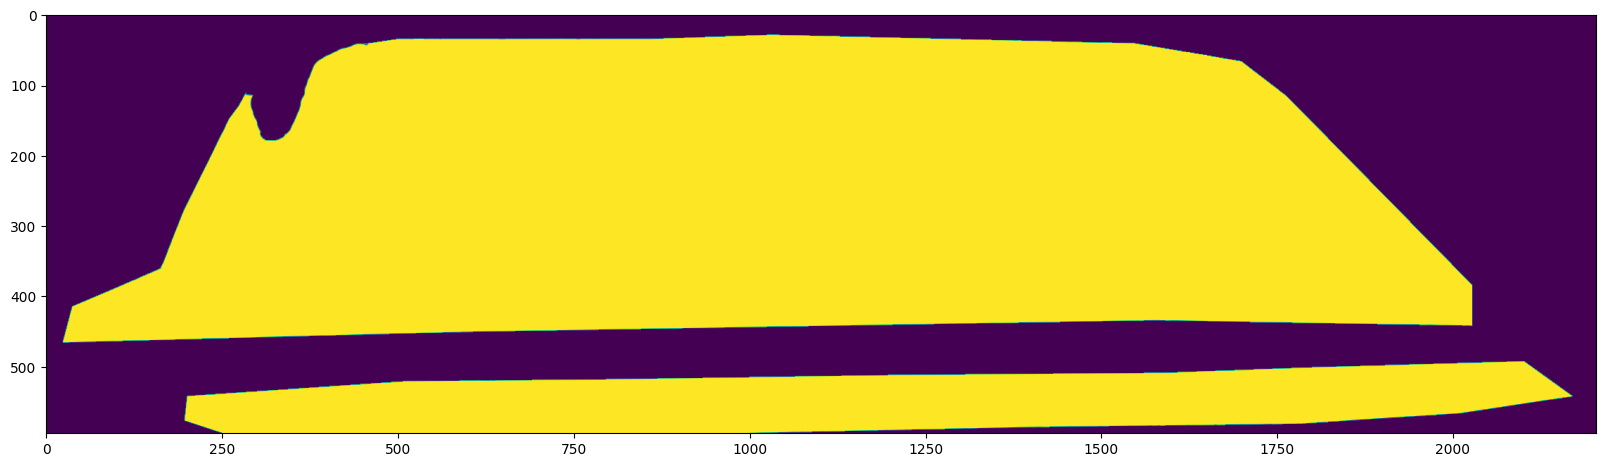

In [5]:
img = cv2.imread('frame.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot()
ax.imshow(img)

plt.show()

0: 1056x3200 97 cars, 11722.8ms
Speed: 28.0ms preprocess, 11722.8ms inference, 9.0ms postprocess per image at shape (1, 3, 1056, 3200)


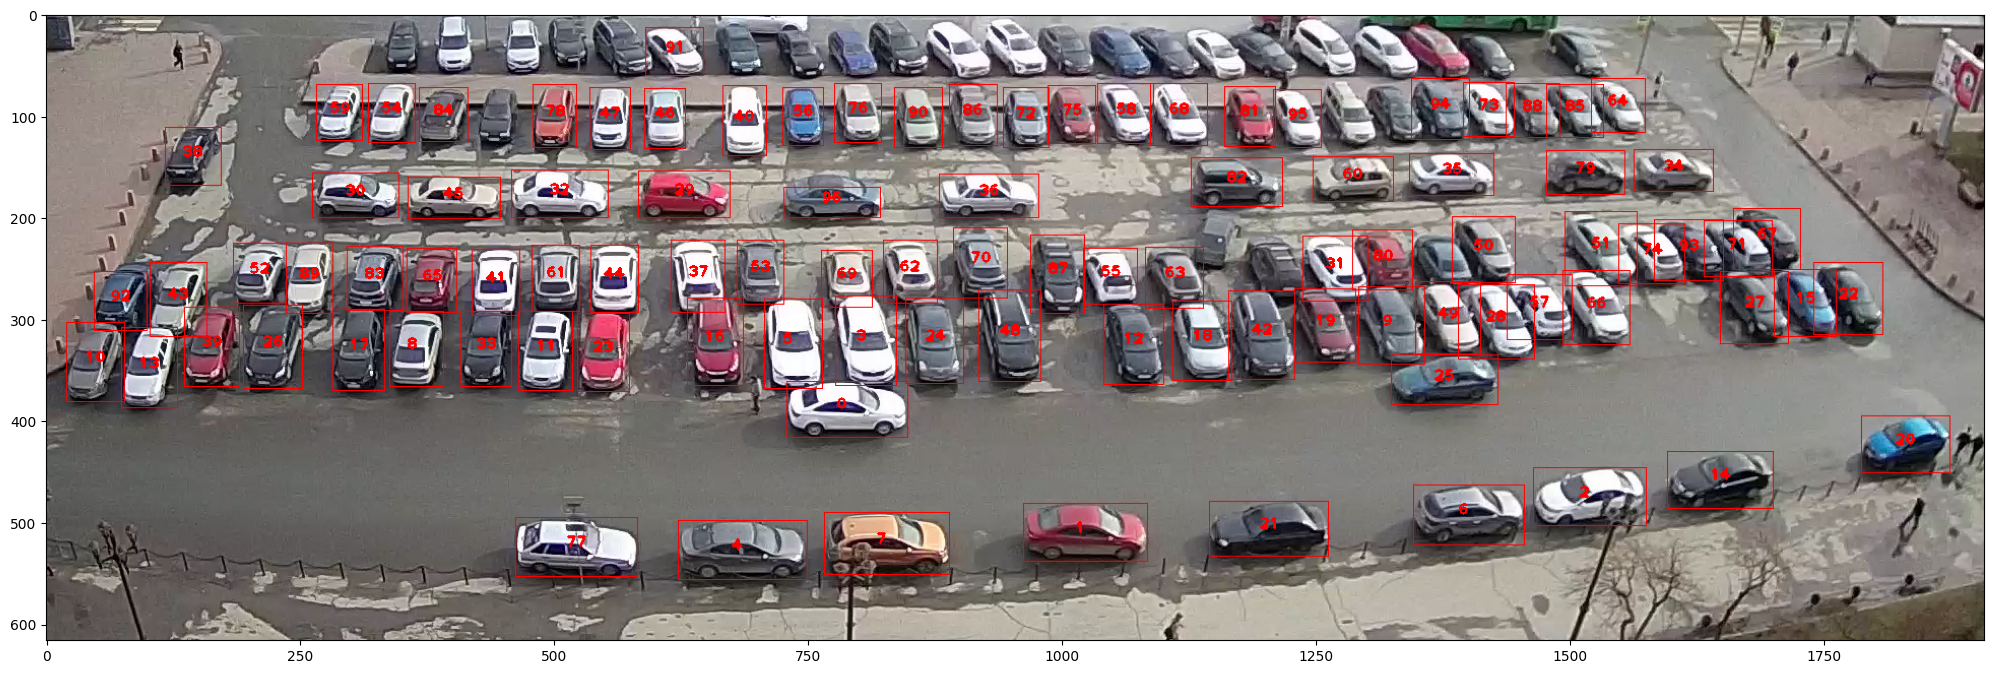

In [7]:
img = cv2.imread('frame.jpg')
cv2.resize(img, (640, 2080))
pred = model.predict(img, classes=classes, imgsz=3200, iou=0.5, conf=0.3)[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for index, box in enumerate(pred.boxes.xyxy):
    cv2.rectangle(img, np.int32([box[0], box[1]]), np.int32([box[2], box[3]]), color=[255, 0, 0])
    cv2.putText(img, str(index), (int(box[0] + box[2]) // 2 - 10, int(box[1] + box[3]) // 2), cv2.FONT_HERSHEY_PLAIN, 1,
                [255, 0, 0], 2)
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot()
ax.imshow(img)
plt.show()

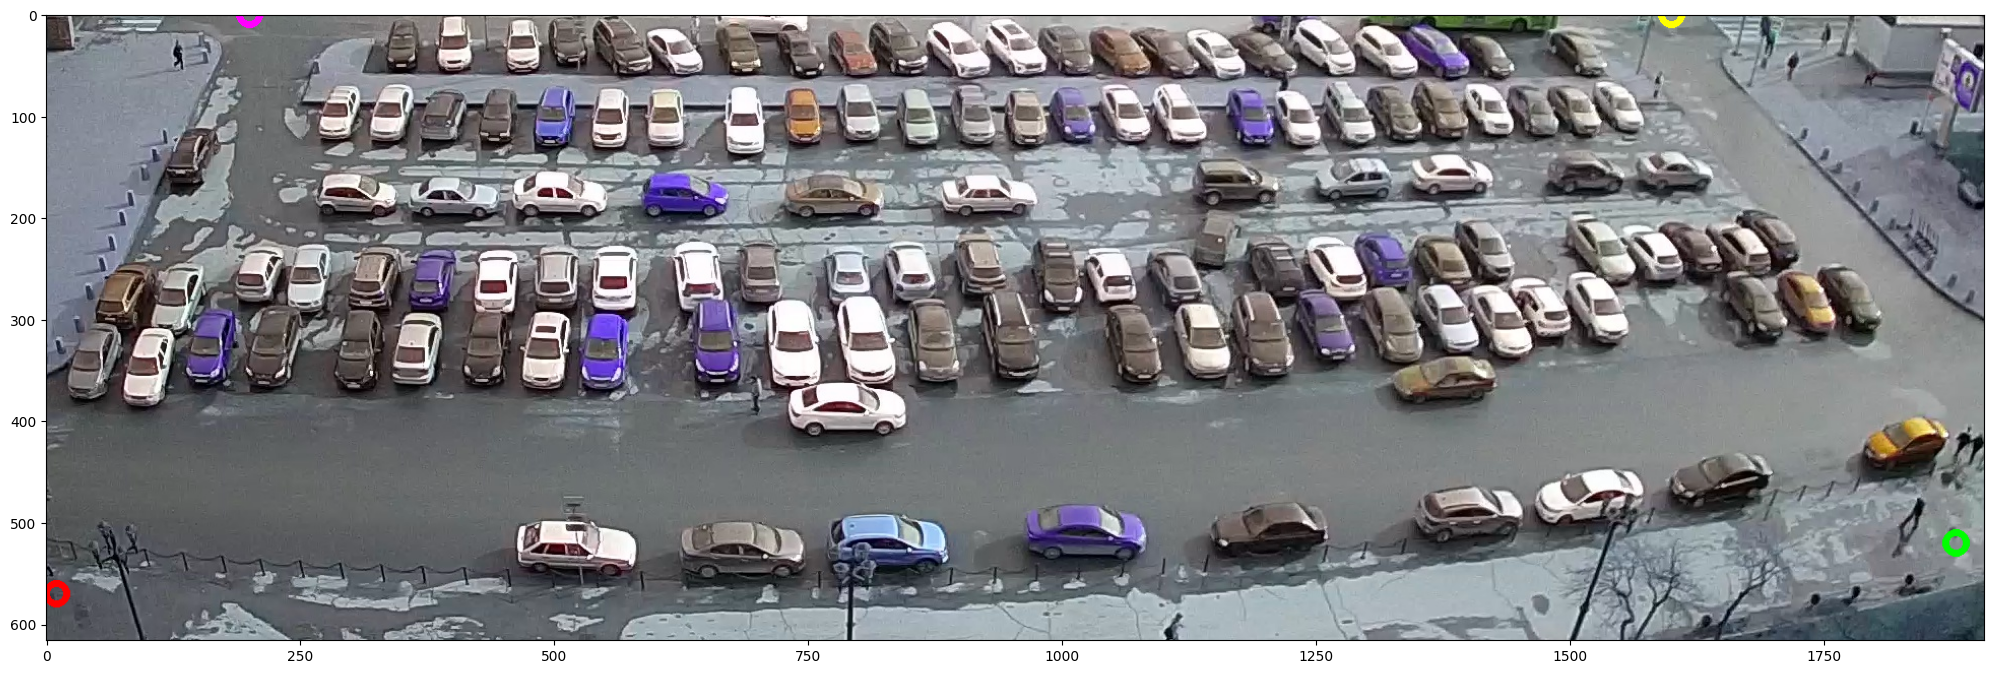

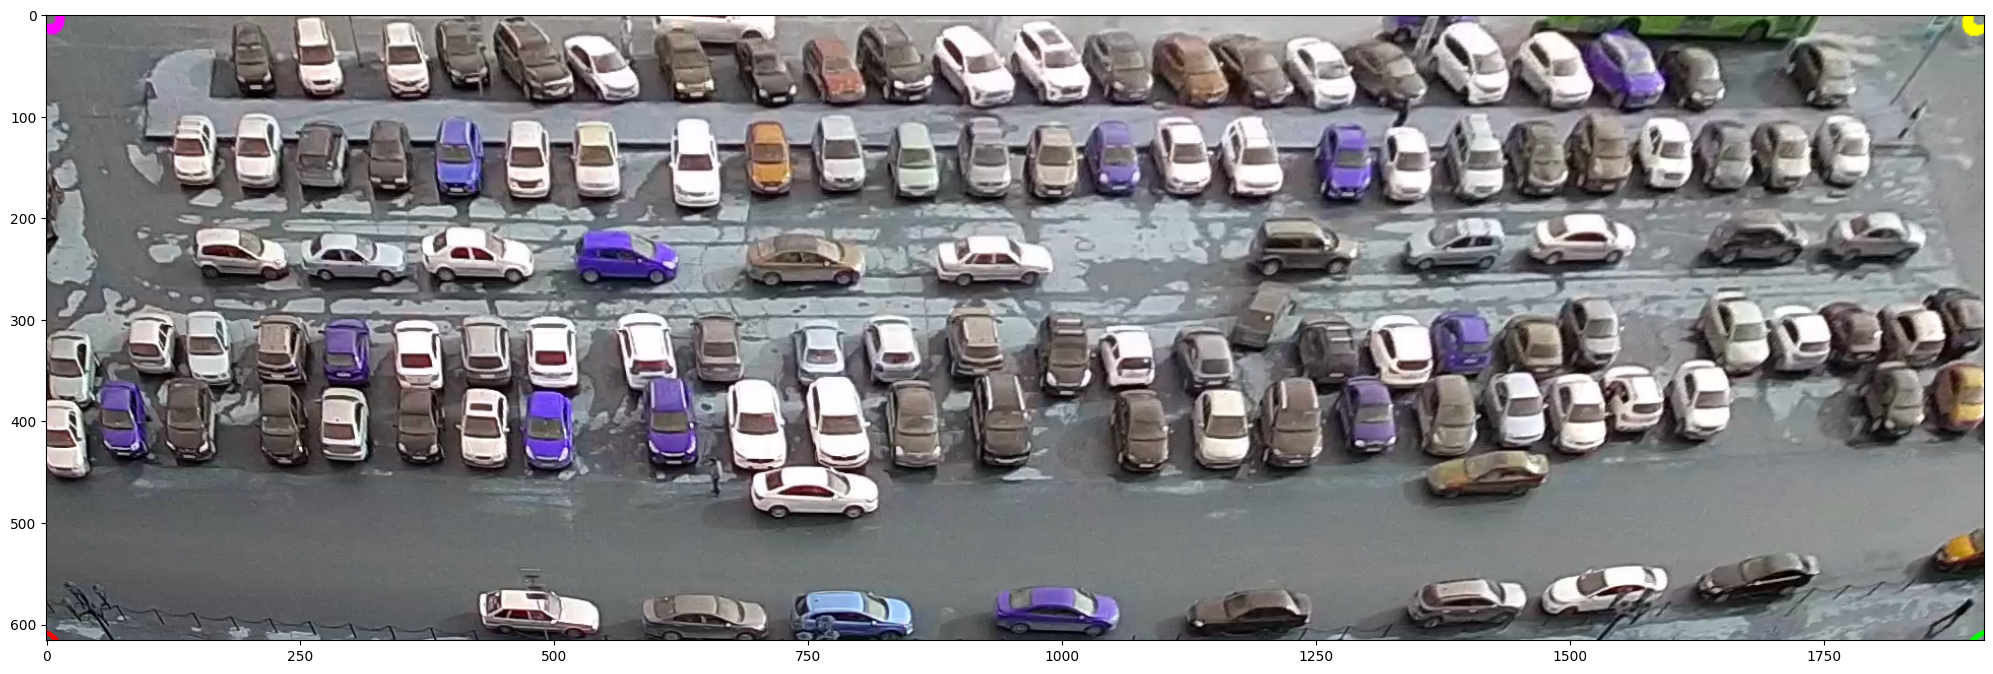

In [8]:
import cv2
import numpy as np

# Загрузка исходного изображения
image = cv2.imread('frame.jpg')

# Нахождение угловых точек на исходном объекте
bottom_left = (10, 570)
bottom_right = (1880, 520)
top_left = (200, 0)
top_right = (1600, 0)

# Преобразование перспективы
height, width = image.shape[:2]
src_points = np.float32([bottom_left, bottom_right, top_left, top_right])
dst_points = np.float32([(0, height), (width, height), (0, 0), (width, 0)])
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

cv2.circle(image, bottom_left, radius=10, color=(255, 0, 0), thickness=5)
cv2.circle(image, bottom_right, radius=10, color=(0, 255, 0), thickness=5)
cv2.circle(image, top_left, radius=10, color=(255, 0, 255), thickness=5)
cv2.circle(image, top_right, radius=10, color=(255, 255, 0), thickness=5)
# Применение преобразования перспективы к изображению
output_image = cv2.warpPerspective(image, matrix, (width, height))
fig = plt.figure(figsize=(25, 12))
ax1 = fig.add_subplot()
ax1.imshow(image)
fig = plt.figure(figsize=(25, 12))
ax2 = fig.add_subplot()
ax2.imshow(output_image)
plt.show()

0: 672x2080 105 cars, 1 motorcycle, 5330.3ms
Speed: 14.0ms preprocess, 5330.3ms inference, 4.0ms postprocess per image at shape (1, 3, 672, 2080)


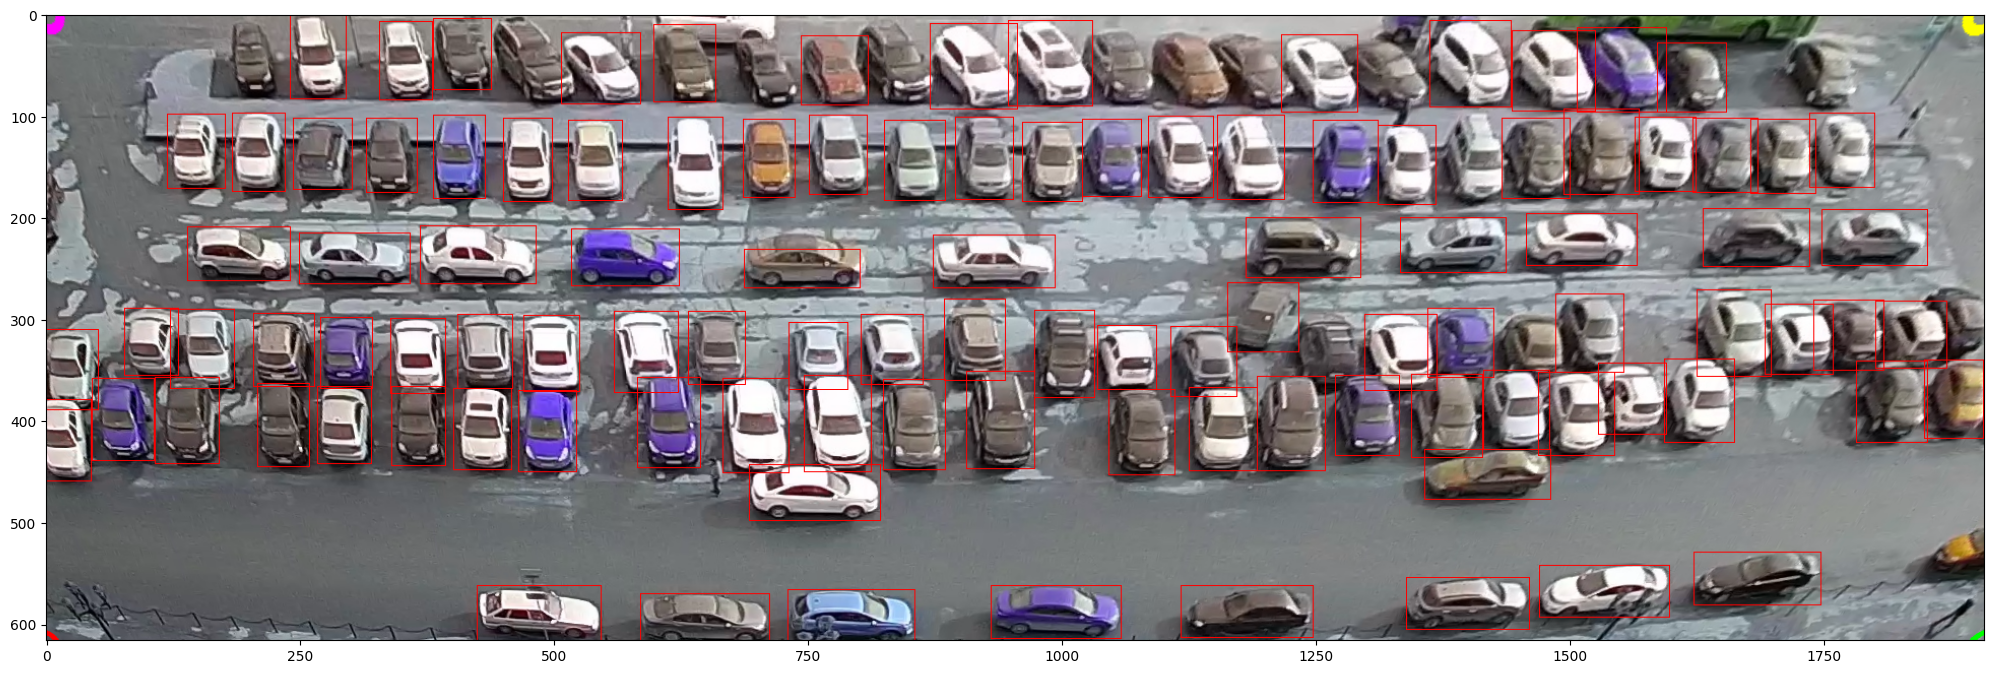

In [9]:
pred = model.predict(output_image, classes=classes, imgsz=2080, iou=0.15)[0]
for box in pred.boxes.xyxy:
    cv2.rectangle(output_image, np.int32([box[0], box[1]]), np.int32([box[2], box[3]]), color=[255, 0, 0])
fig = plt.figure(figsize=(25, 12))
ax = fig.add_subplot()
ax.imshow(output_image)
plt.show()

In [1]:
import cv2
import numpy as np

def undistort_image(image, camera_matrix, distortion_coeffs):
    h, w = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion_coeffs, (w, h), 1, (w, h))
    undistorted_image = cv2.undistort(image, camera_matrix, distortion_coeffs, None, new_camera_matrix)
    return undistorted_image


image = cv2.imread('result_images/orig_frame.jpg')


# Получение размеров изображения


# Параметры калибровки камеры (матрица камеры и коэффициенты искажения) - замените на ваши значения

camera_matrix = np.array([[1536,    0,  985],
                         [   0,  1370,  848],
                         [   0,    0,    1]])
distortion_coeffs = np.array([0.56445602, -3.90709239, -0.11322025, -0.01859485, 10.33998831])

# Исправление искажения
undistorted_image = undistort_image(image, camera_matrix, distortion_coeffs)

undistorted_image = cv2.resize(undistorted_image, (1280, 720))

# # Отображение и сохранение результата
cv2.imshow("Undistorted Image", undistorted_image)
cv2.waitKey()

cv2.destroyAllWindows()
cv2.imwrite("undistorted_image.jpg", undistorted_image)

# fig = plt.figure(figsize=(25, 12))
# ax = fig.add_subplot()
# ax.imshow(undistorted_image)
# plt.show()

True